<a href="https://colab.research.google.com/github/samTeouri/LogicFlow/blob/main/choixActiviteLogiqueFloue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activités dans le flou avec skfuzzy

L'objectif est de pouvoir représenter des règles de type :
- si le temps est 'ensoleillé' et la température est 'temperée' et le vent est 'faible', alors l'activite est 'intense'
- si le temps est 'ensoleillé' et la température est 'chaude', alors l'activite est 'modérée'
- si le temps est 'nuageux' et la température est 'temperée' et le vent est 'moderé', alors l'activite est 'moderée'
- si le temps est 'pluvieux' et la température est 'froide' et le vent est 'fort', alors l'activite est 'faible'


Reprenez les exemples d'utilisation de la logique floue et adaptez les à ce problème

On utilise pour cela la librairie python skfuzzy
*(si elle n'est pas présente, installez là avec cette ligne : !pip install -U scikit-fuzzy)*

In [1]:
 !pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 19.4 MB/s eta 0:00:00


In [2]:
#les imports
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## les antécédents et les conséquents
- Les antécédents sont les variables utilisées pour prendre les décisions (ici le temps, la température et le vent)
    - le temps est codé sur 0,100 où les ensembles ensoleillé, nuageux, pluvieux sont définis  
    - la température est codée sur -10,45 pour les ensembles froide, tempérée, chaude  
    - le vent est codé sur 0,100 où les ensembles faible, modéré, fort sont définis  
- le conséquent est l'activité, codée sur 0,100 où les ensembles faible, modéré, intense sont définis  

In [3]:
temps = ctrl.Antecedent(np.arange(0,101,1), 'temps')
temperature = ctrl.Antecedent(np.arange(-10,50,5), 'temperature')
vent = ctrl.Antecedent(np.arange(0,101,1), 'vent')
activite = ctrl.Consequent(np.arange(0,101,1), 'activite')

# Ensemble fous

On définit ensuite les ensembles flous utilisés dans les antécédents et les conséquents. Puis on vérifie les courbes d'appartenance :

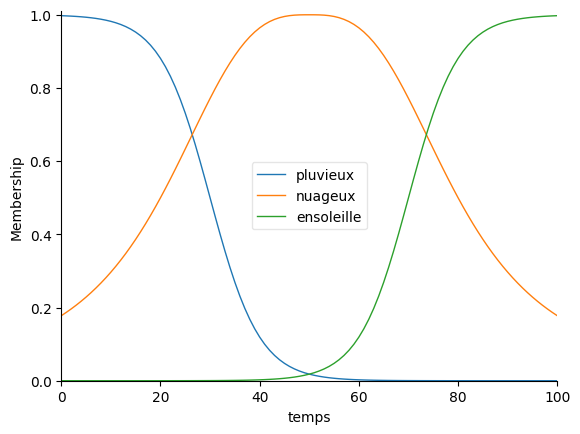

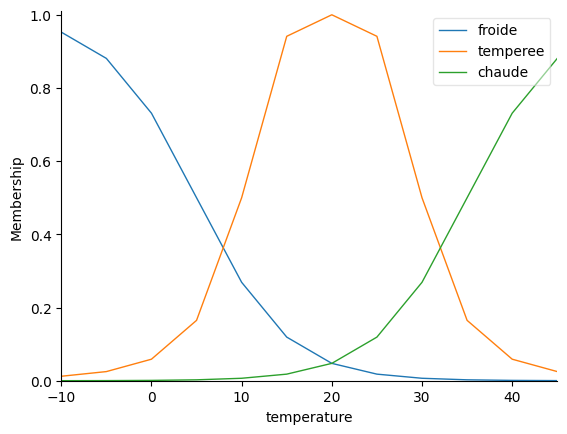

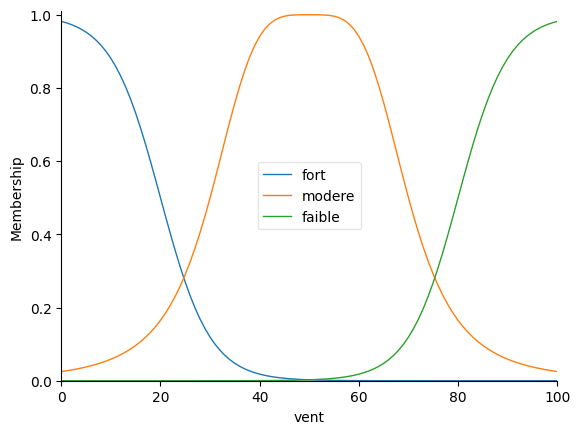

In [4]:
#ensembles pour le temps (l'ensolleillement, on suppose que l'on peut capter un degré de luminosite entre 0 et 100%)
#une courbe sigmoide, meteo moche aux températures froides, et est à moitié moche à 8°
temps_pluvieux = fuzz.sigmf(temps.universe, 30, -0.2)
#une courbe en cloche, météo commmence à être ressentie légèrement moyenne à 12°, parfaitement moyenne à 15° pour décroitre et ne l'être plus à 18°
temps_nuageux = fuzz.gbellmf(temps.universe, 30, 1.5, 50) #on dessine la moitié de la cloche, l'autre sera son miroir
#une courbe sigmoide, meteo belle aux températures chaude, et est à moitié belle à 20°
temps_ensoleille = fuzz.sigmf(temps.universe, 70, 0.2)
temps['pluvieux'] = temps_pluvieux
temps['nuageux'] = temps_nuageux
temps['ensoleille'] = temps_ensoleille
temps.view()

temperature_froide = fuzz.sigmf(temperature.universe, 5, -0.2)
temperature_temperee = fuzz.gbellmf(temperature.universe, 10, 2, 20)
temperature_chaude = fuzz.sigmf(temperature.universe, 35, 0.2)
temperature['froide'] = temperature_froide
temperature['temperee'] = temperature_temperee
temperature['chaude'] = temperature_chaude
temperature.view()

vent_fort = fuzz.sigmf(vent.universe, 20, -0.2)
vent_modere = fuzz.gbellmf(vent.universe, 20, 2, 50)
vent_faible = fuzz.sigmf(vent.universe, 80, 0.2)
vent['fort'] = vent_fort
vent['modere'] = vent_modere
vent['faible'] = vent_faible
vent.view()

Ensemble flou pour le conséquent

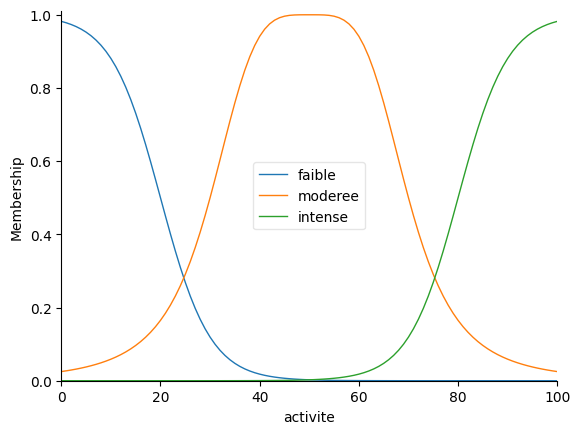

In [5]:
activite_faible = fuzz.sigmf(activite.universe, 20, -0.2)
activite_moderee = fuzz.gbellmf(activite.universe, 20, 2, 50)
activite_intense = fuzz.sigmf(activite.universe, 80, 0.2)

activite['faible'] = activite_faible
activite['moderee'] = activite_moderee
activite['intense'] = activite_intense

activite.view()

Définition des règles floues

In [6]:
regle1 = ctrl.Rule(temps['ensoleille'] & temperature['temperee'] & vent['faible'], activite['intense'])
regle2 = ctrl.Rule(temps['ensoleille'] & temperature['chaude'], activite['moderee'])
regle3 = ctrl.Rule(temps['nuageux'] & temperature['temperee'] & vent['modere'], activite['moderee'])
regle4 = ctrl.Rule(temps['pluvieux'] & temperature['froide'] & vent['fort'], activite['faible'])

systeme_controle = ctrl.ControlSystem([regle1, regle2, regle3, regle4])
systeme = ctrl.ControlSystemSimulation(systeme_controle)

Utilisation du système

Activité prédite : 50.0


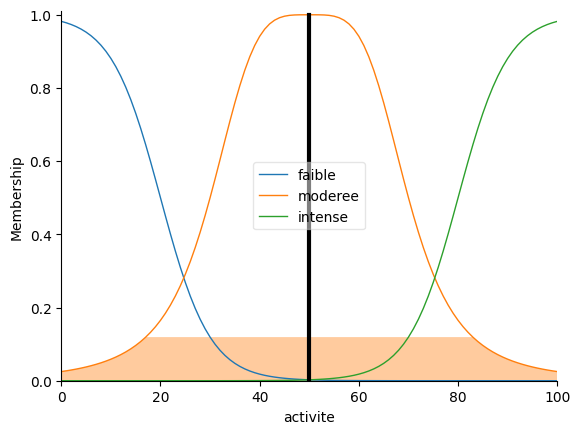

In [7]:
systeme.input['temps'] = 80  # Temps ensoleillé
systeme.input['temperature'] = 25  # Température chaude
systeme.input['vent'] = 10  # Vent faible

# Calcul de l'activité
systeme.compute()

# Affichage du résultat
print("Activité prédite :", systeme.output['activite'])
activite.view(sim=systeme)